# Data Visualization

# Univariate Visualizations

## Target

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
path = 'all_grades_data_cleaned.csv'
df = pd.read_csv(path, index_col = 0)

In [3]:
# inspect
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49012 entries, 12 to 64185
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   section_type       49012 non-null  object 
 1   instructor_id      49012 non-null  object 
 2   facility_code      45521 non-null  object 
 3   start_time         49012 non-null  float64
 4   mon                49012 non-null  bool   
 5   tues               49012 non-null  bool   
 6   wed                49012 non-null  bool   
 7   thurs              49012 non-null  bool   
 8   fri                49012 non-null  bool   
 9   subject_name       49012 non-null  object 
 10  course_name        49012 non-null  object 
 11  a_proportion       49012 non-null  float64
 12  f_proportion       49012 non-null  float64
 13  avg_grade          49012 non-null  float64
 14  year               49012 non-null  int64  
 15  term               49012 non-null  object 
 16  class_length       49

,section_type,instructor_id,facility_code,start_time,mon,tues,wed,thurs,fri,subject_name,course_name,a_proportion,f_proportion,avg_grade,year,term,class_length,total_time,weekend,course_difficulty
3790,lec,other,0482,570.0,False,True,False,True,False,environmental studies - gaylord nelson institute,other,0.307692,0.0,3.384615,15,fall,75.0,150,False,intermediate
51912,lec,other,0482,595.0,True,True,True,True,False,french (french and italian),third semester french,0.333333,0.0,3.333333,11,fall,50.0,200,False,elementary
60894,lec,768391.0,0031,660.0,False,True,False,True,False,kinesiology,other,0.888889,0.0,3.916667,16,fall,50.0,100,False,intermediate
63227,lab,other,0469,990.0,False,True,False,True,False,music-performance,other,0.571429,0.0,3.785714,7,fall,50.0,100,False,elementary
21847,lec,other,0140,960.0,True,False,True,False,False,accounting and information systems,financial reporting ii,0.277778,0.0,3.250000,12,fall,75.0,150,False,intermediate
33934,lab,4197306.0,0469,595.0,False,True,False,True,False,music,conducting,0.500000,0.0,3.500000,18,fall,50.0,100,False,elementary
33267,lec,other,0482,865.0,True,False,True,False,True,east asian languages and literature,elementary chinese,0.416667,0.0,3.500000,8,fall,50.0,150,False,elementary
46016,lec,other,0449,930.0,False,True,False,False,False,nutritional sciences,other,0.909091,0.0,3.909091,17,spring,50.0,50,False,advanced
31554,lec,3128595.0,0482,530.0,True,False,True,False,True,literature in translation,survey of japanese literature in translation,0.294118,0.0,3.647059,15,fall,50.0,150,False,elementary
55023,lab,4440791.0,0469,800.0,True,False,True,False,False,art department,other,0.700000,0.0,3.850000,12,fall,150.0,300,False,advanced


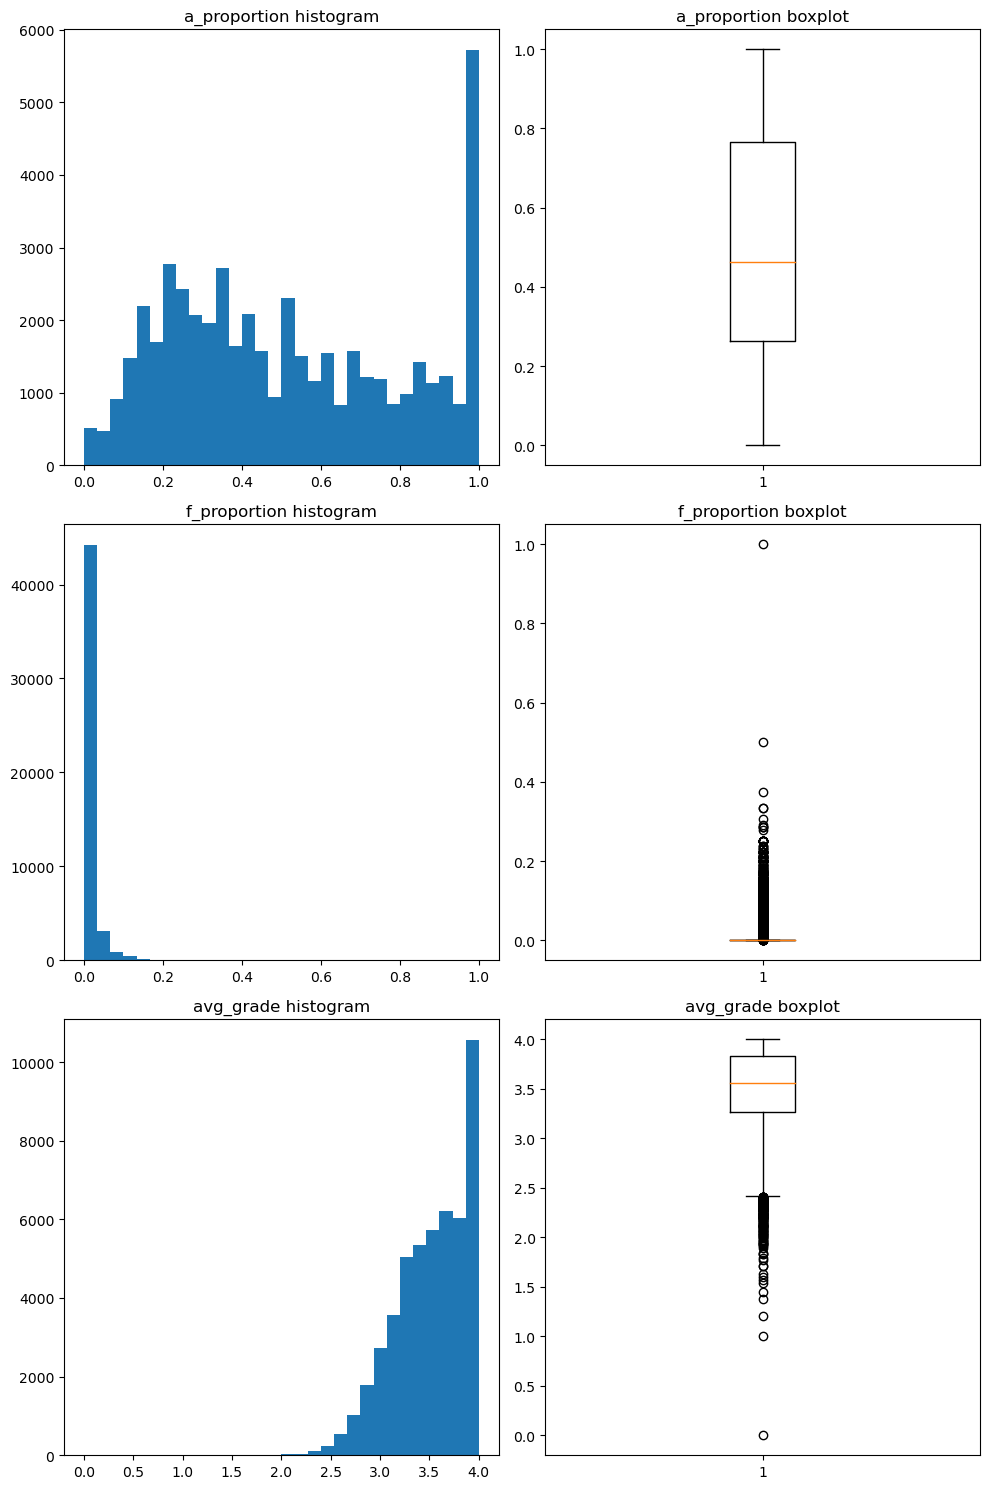

In [17]:
# three target variables: 'a_proportion', 'f_proportion', 'avg_grade'
# histograms and boxplots

targets = ['a_proportion', 'f_proportion', 'avg_grade']
targets_df = df[['a_proportion', 'f_proportion', 'avg_grade']]

fig, axes = plt.subplots(nrows = len(targets), ncols = 2, figsize = (10, 15))

for i, col in enumerate(targets_df):
#     print(f"i: {i}")
#     print(f"col: {col}")

    axes[i][0].hist(df[col], bins = 30)
    axes[i][0].set_title(f"{col} histogram")
    
    axes[i][1].boxplot(df[col])
    axes[i][1].set_title(f"{col} boxplot")

plt.tight_layout()

There is a very interesting distribution of As and Fs. The number of courses that have an a_proportion of 1, meaning that all students who received a letter grade in that section received an A, is extremely high. This tells me that it may be difficult to predict it, since there may not be enough variation in the distribution to predict. It would be interesting to see if taking out the As would result in predicting more of the grade variation between B and F.

The a_proportion boxplot shows us that most of the sections are centered around a median close to 0.5, meaning that out of all letter grades awarded, about have were As.

The f_distribution shows what we would expect with the a_proportion, that since there are a lot of sections with an a_proportion of 1, there are equally as many sections with an f_proportion of 0. Again, taking Fs out to see if we can predict the remaining grade variation better would be interesting.

The f_proportion boxplot shows us that by far most courses did not have any meaningful percentage of Fs, and the outlier course with the highest proportion of Fs had about 10% of the section awarded an F grade.

The avg_grade, which is on a 4.0 grade-point scale, is skewed toward 4.0 with the number of sections with all As. It tapers down more or less until about a 2.25, after which there are not enough courses in those bins to see on the plot. A 2.0 is a C, which in my experience is the grade requirement to receive credit for a course (for a variety of reasons, such as it being a course in a major/minor). Although a D grade usually gives credit, there are many grade requirements that require a C. Given this information, it is interesting to see that a vast majority of courses have an average grade of above a 2.0, and definitely above a 1.0, meaning that the majority of students usually pass a course.

The average grade boxplot shows us that most sections had a very high average grade, and only 20% of courses had an average grade of below about 2.5. There are several outlier sections with lower average grades, and one outlier section with an average grade of 0.0, which is an F.

## Outliers

In [18]:
df[df['avg_grade'] == 0]

,section_type,instructor_id,facility_code,start_time,mon,tues,wed,thurs,fri,subject_name,course_name,a_proportion,f_proportion,avg_grade,year,term,class_length,total_time,weekend,course_difficulty
39484,lab,2601912.0,0028,560.0,False,False,False,False,True,physical educ activity progm,adapted fitness&pers traing,0.0,1.0,0.0,8,fall,100.0,100,False,elementary


This is a very interesting case, but without more information suggesting it is not valid, I will keep it in the dataset for now.

## Features

In [19]:
# look at all the features' dtypes
df.dtypes

section_type          object
instructor_id         object
facility_code         object
start_time           float64
mon                     bool
tues                    bool
wed                     bool
thurs                   bool
fri                     bool
subject_name          object
course_name           object
a_proportion         float64
f_proportion         float64
avg_grade            float64
year                   int64
term                  object
class_length         float64
total_time             int64
weekend                 bool
course_difficulty     object
dtype: object

In [22]:
dtypes = df.dtypes
cat_cols = dtypes

TypeError: 'Series' object is not callable

In [ ]:
all_features = ['section_type', 'instructor_id', 'facility_code', 'start_time',
            'mon', 'tues', 'wed', 'thurs', 'fri', 'weekend', 'subject_name',
            'course_name', 'year', 'term', 'class_length', 'total_time', 
            'course_difficulty']

In [ ]:
categorical_features = ['section_type', 'instructor_id', 'facility_code', 
                        'mon', 'tues', 'wed', 'thurs', 'fri', 'weekend', 
                        'subject_name', 'course_name', 'year', 'term',
                        'course_difficulty']

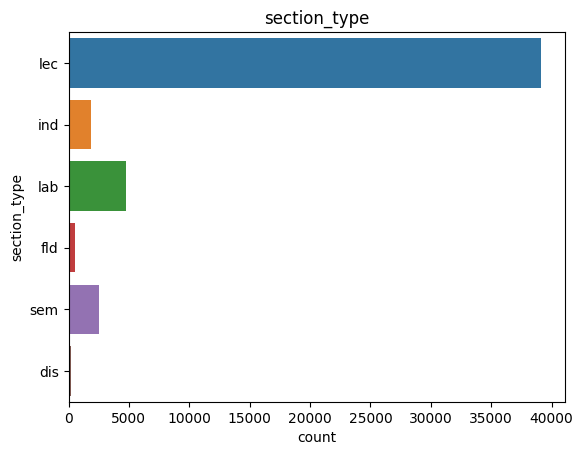

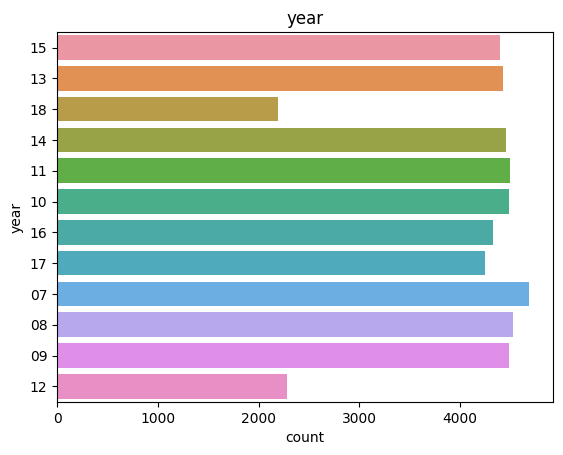

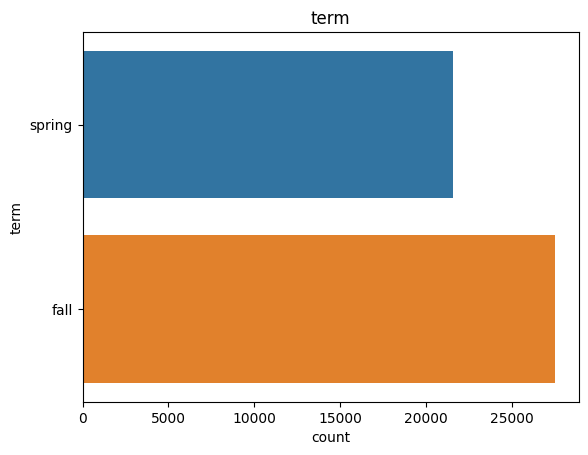

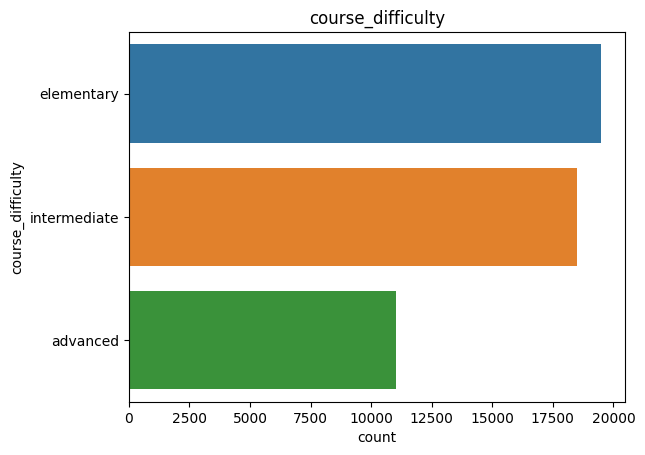

In [ ]:
# barplots to explore categorical features except 'instructor_id', 'subject_
# name', 'course_name', and 'facility_code', which have too many distinct
# values to visualize cleanly

for col in ['section_type', 'year', 'term', 'course_difficulty']:
  col_name = col
  plot = sns.countplot(data = df, y = col)
  plot.set_title(col_name)
  plt.show()
  print('\n\n')

By far the most common section type is lecture. This is plausible; other section types are more specific and are reserved for non-typical classes. 

I'm not sure why the years 2012 and 2018 seem to have significantly fewer (almost by half) courses in the dataset compared to other years. This would be something to further investigate with the data originator. 

More courses are offered in Fall than Spring terms in general, so the breakdown by term looks normal. It is interesting that no Summer term courses are included in the dataset, and would be a very interesting addition. Students often wonder if they should take Summer courses, which are usually shorter in absolute duration, than semester-long classes. 

The distribution of course difficulty looks normal as well. Most courses are at the elementary/introductory level, then fewer students continue on to the intermediate then advanced courses, so there are fewer of those offered. 

In [ ]:
# visualize when courses meet
# count plot with mon-weekend as bars (true values)

In [ ]:
# good way to visualize 'instructor_id', 'course_name', 'subject_name', 'facility_code'?
# 'facility_code' = map of campus with key for facility_code numbers?
# subject_name = would probably have to group into departments, then could visualize with circle sizes; same with course_name

In [ ]:
numeric_features = ['start_time', 'class_length', 'total_time']

# histograms, boxplots for start_time, class_length, total_time

In [ ]:
df.describe(include = 'number')

,start_time,a_proportion,f_proportion,avg_grade,class_length,total_time
count,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000
mean,676.647494,0.514208,0.008356,3.514628,74.034012,147.119073
std,241.312605,0.293018,0.023905,0.374382,48.227477,124.701743
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,570.000000,0.264706,0.000000,3.264706,50.000000,115.000000
50%,660.000000,0.461804,0.000000,3.559322,75.000000,150.000000
75%,865.000000,0.764706,0.000000,3.833333,75.000000,150.000000
max,1260.000000,1.000000,1.000000,4.000000,600.000000,3000.000000


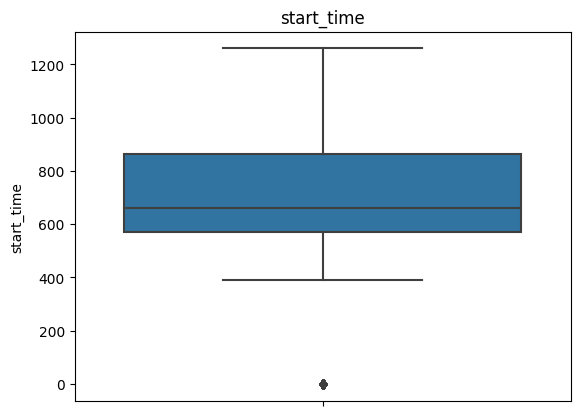

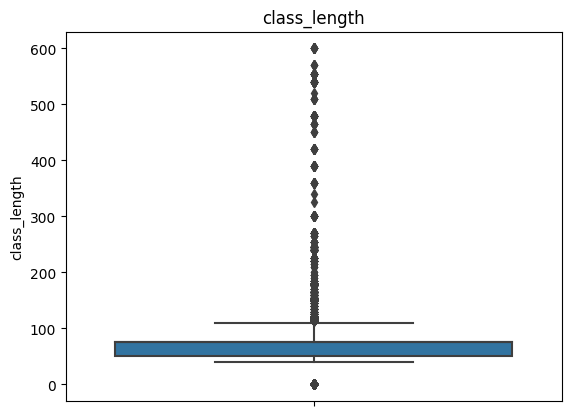

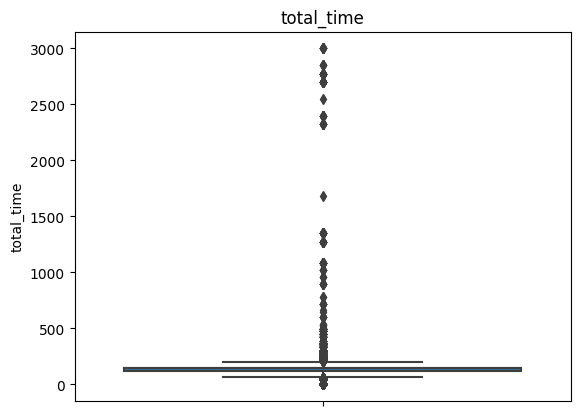

In [ ]:
# boxplots for numeric variables to see outliers

for col in numeric_features:
  col_name = col
  plot = sns.boxplot(data = df, y = col)
  plot.set_title(col_name)
  plt.show()
  print('\n\n')

The outliers for 'start_time' that seem to be around 0 are the ones that don't have a start time assigned; they are coded in the original .csv files on Kaggle with the value -1.

Leaving out outliers for 'class_length' and 'total_time', the middle 50% of sections are between 50-75 minutes long and meet for a total of between 115-150 minutes per week. 



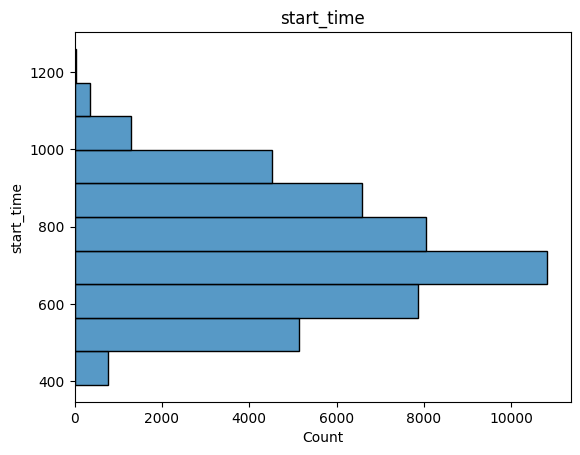

In [ ]:
# histogram for start_time without outliers at -1
start_time_no_outliers_df = df[df['start_time'] != -1]

plot = sns.histplot(data = start_time_no_outliers_df, 
                    y = 'start_time',
                    bins = 10)
plot.set_title('start_time')
plt.show()

This histogram without outliers for start_time shows a relatively normal distribution centered around around 700 minutes (11 2/3 hours, so around noon). It makes sense that about half of classes start before noon and about half after. 

# Export to csv

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49012 entries, 12 to 64185
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   section_type       49012 non-null  object 
 1   instructor_id      49012 non-null  object 
 2   facility_code      45521 non-null  object 
 3   start_time         49012 non-null  float64
 4   mon                49012 non-null  object 
 5   tues               49012 non-null  object 
 6   wed                49012 non-null  object 
 7   thurs              49012 non-null  object 
 8   fri                49012 non-null  object 
 9   subject_name       49012 non-null  object 
 10  course_name        49012 non-null  object 
 11  a_proportion       49012 non-null  float64
 12  f_proportion       49012 non-null  float64
 13  avg_grade          49012 non-null  float64
 14  year               49012 non-null  object 
 15  term               49012 non-null  object 
 16  class_length       49

In [ ]:
df.to_csv('/content/drive/MyDrive/Coding Dojo/Project 2/all_grades_data_cleaned.csv')